In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [206]:
#importing datasets
linear_data = pd.read_csv("../data/modeling/linear_regression.csv",index_col = 0)
tree_data = pd.read_csv('../data/modeling/decision_tree.csv', index_col = 0)
lasso_data = pd.read_csv('../data/modeling/lasso_regression.csv', index_col = 0)
targets = pd.read_csv('../data/modeling/targets.csv', index_col = 0)
colinear = pd.read_csv('../data/modeling/co_linear.csv', index_col = 0)

In [207]:
tree_data.drop(columns = 'index', inplace = True)
lasso_data.drop(columns = targets.columns, inplace = True)
pd.merge(lasso_data, colinear)

,Median Sales Price,PercentShortTermRentals,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,...,prop_Private room in guest suite,prop_Private room in guesthouse,prop_Private room in hostel,prop_Private room in house,prop_Private room in loft,prop_Private room in resort,prop_Private room in townhouse,prop_Room in aparthotel,prop_Room in boutique hotel,prop_Tiny house
0,134250.0,4.626335,100.0,100.0,1,1,1,8,2.000000,4.0,...,0,0,0,0,0,0,0,0,0,0
1,134250.0,4.626335,96.0,98.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
2,134250.0,4.626335,100.0,84.0,1,1,1,4,1.000000,2.0,...,0,0,0,0,0,0,0,0,0,0
3,134250.0,4.626335,95.0,99.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
4,134250.0,4.626335,100.0,100.0,0,1,1,8,2.000000,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,314500.0,2.684564,100.0,94.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
2232,314500.0,2.684564,100.0,94.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
2233,314500.0,2.684564,100.0,94.0,0,1,1,4,2.500000,2.0,...,0,0,0,0,0,0,0,0,0,0
2234,314500.0,2.684564,98.0,100.0,0,1,1,8,2.000000,2.0,...,0,0,0,0,0,0,0,0,1,0


In [208]:
lasso_data.shape


(2222, 221)

# Creating a Hold Out Set

Splitting the data first ensures the same training and test sets are used for all the models. 

In [209]:
#checks to make sure data is still indexed the same by taking a 
#column with continuous values and making sure it is the same across least manipulated and most manipulated dataset. 
print((linear_data["reviews_per_month"]==tree_data["reviews_per_month"]).unique())

[ True]


In [210]:
y = np.log(targets['price']) #chooses target variable
test_size = .3#chooses test size

X_train_tree, X_test_tree, y_train, y_test = train_test_split(tree_data, y, test_size = test_size)#splits data for decision tree model
def split(data):#takes in data a returns split data with the same train and test data with the same index as original split
    train = data.iloc[list(X_train_tree.index)]
    test = data.iloc[list(X_test_tree.index)]
    return train, test

X_train_lin, X_test_lin = split(linear_data)#splits linear data
X_train_lasso, X_test_lasso = split(lasso_data)#splits lasso data

In [211]:
#makes sure everything is indexed the same.
list(X_train_tree.index)==list(X_train_lin.index)==list(X_train_lasso.index)==list(y_train.index)
        

True

In [212]:
print(y[:5])

0    4.969813
1    4.553877
2    4.254619
3    4.499810
4    4.488636
Name: price, dtype: float64


# Linear Regression Model
The first model I'll try is mulitple linear regression from sklearn's linear regression. For this model, I'm only using the 20 features most correlated to price per person. Features with high colinearity were also removed from this data. 
Linear regression requires that data be standardized 

In [213]:
scaler = MinMaxScaler()


X_train_lin = scaler.fit_transform(X_train_lin)#fits on training set then transforms training set

X_test_lin = scaler.transform(X_test_lin)#transforms test set using fit from training set. This keeps information from the test set from leaking into the training data.

In [214]:
lin = LinearRegression()
cv = cross_val_score(lin, X_train_lin, y_train, cv = 10)
cv.mean()

0.5497091774776315

# Lasso Regression

In [215]:
lasso = Lasso()
params = {'alpha': [.1,.2,.3,.4,.5]+list(range(1,50))}
gridcv = GridSearchCV(lasso, param_grid=params, cv = 10)
gridcv.fit(X_train_lasso, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                   20, 21, 22, 23, 24, 25, ...]})

In [216]:

print(gridcv.best_params_)
print(gridcv.best_score_)

{'alpha': 0.1}
0.5131229380615494


In [217]:
lasso = Lasso(alpha = .1)
lasso.fit(X_train_lasso,y_train)

Lasso(alpha=0.1)

In [218]:
y_pred = lasso.predict(X_test_lasso)

In [219]:
r2_score(y_test, y_pred)

0.5423138209095092

In [220]:
results=y_test.to_frame().reset_index()
results['predicted_price']=pd.Series(y_pred)
results['predicted_price']=np.exp(results.predicted_price)
results['price']=np.exp(results.price)
results['difference'] =results.predicted_price-results.price
results.head()

,index,price,predicted_price,difference
0,1299,250.0,136.033066,-113.966934
1,1817,99.0,111.302959,12.302959
2,2140,87.0,107.153074,20.153074
3,1685,130.0,115.617373,-14.382627
4,1115,179.0,178.323454,-0.676546


<AxesSubplot:xlabel='price', ylabel='difference'>

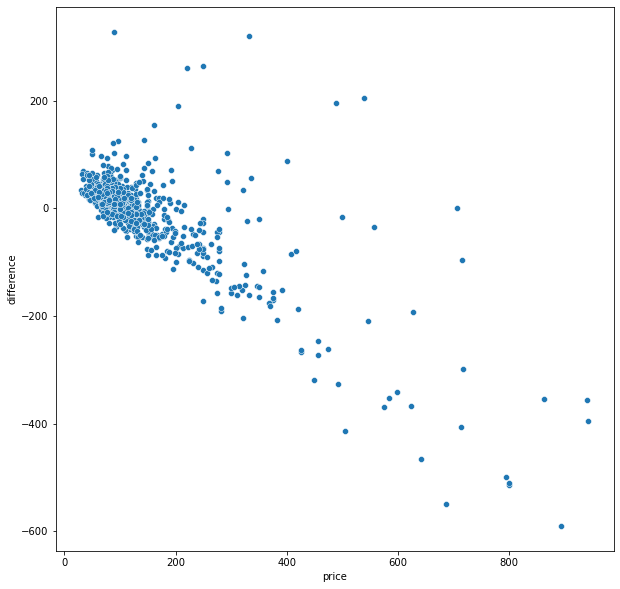

In [221]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data = results, x='price', y='difference')

In [222]:
results[results['price']<200]

,index,price,predicted_price,difference
1,1817,99.00,111.302959,12.302959
2,2140,87.00,107.153074,20.153074
3,1685,130.00,115.617373,-14.382627
4,1115,179.00,178.323454,-0.676546
5,2013,111.00,69.368240,-41.631760
...,...,...,...,...
662,1328,100.00,108.421882,8.421882
663,1339,77.57,107.061672,29.491672
664,1735,157.00,226.932998,69.932998
665,566,67.00,75.409723,8.409723


<AxesSubplot:xlabel='price', ylabel='difference'>

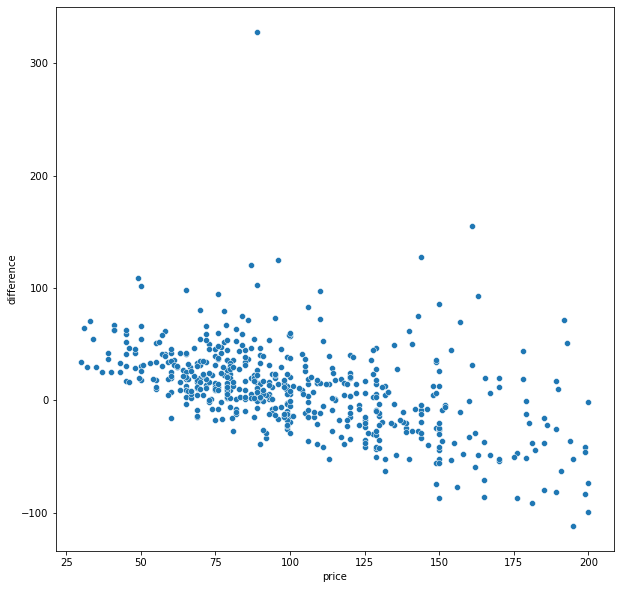

In [223]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data = results[results['price']<200],x='price',y='difference')

In [224]:
from sklearn.dummy import DummyRegressor

In [225]:
dummy = DummyRegressor()
dummy.fit(X_train_lasso, y_train)
dummy_y = dummy.predict(X_test_lasso)
r2_score(y_test, dummy_y)

-6.756559663267936e-05

# Ridge Regression 

In [226]:
from sklearn.linear_model import Ridge

In [227]:
ridge = Ridge()
params = {'alpha': [.1,.2,.3,.4,.5]+list(range(1,50))}
gridcv = GridSearchCV(ridge, param_grid=params, cv = 10)
gridcv.fit(X_train_lasso, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                   20, 21, 22, 23, 24, 25, ...]})

In [228]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'alpha': 36}
0.6577378690873285


In [230]:
ridge = Ridge(alpha = 36)
ridge.fit(X_train_lasso, y_train)

Ridge(alpha=36)

In [231]:
y_pred  = ridge.predict(X_test_lasso)

In [232]:
r2_score(y_test, y_pred)

0.6536576601603415

# Random Forest

In [22]:
X = lasso_data
X_train, x_test = split(X)

In [23]:
rf = RandomForestRegressor()
params = {'n_estimators':[1000]}
gridcv = GridSearchCV(rf, param_grid=params, cv = 5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1000]})

In [24]:
gridcv.best_score_

0.6677058634918798

In [25]:
rf=RandomForestRegressor(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [26]:
y_pred = rf.predict(x_test)

In [27]:
r2_score(y_test, y_pred)

0.7248818373304216

In [28]:
np.sqrt(np.mean((((y_pred)**2)-((y_test)**2))**2))

3.483931179890604

In [29]:
results=y_test.to_frame().reset_index()#creates dataframe to compare actual vs predicted prices
results['predicted_price']=pd.Series(y_pred)#adds a column for prices predicted by RF
results['predicted_price']=np.exp(results.predicted_price)#brings predicted prices back to scale from log
results['price']=np.exp(results.price)#brings test prices back to scale
results['residual'] =results.predicted_price-results.price#calculates residuals
results.head()

,index,price,predicted_price,residual
0,0,144.0,211.510912,67.510912
1,1769,570.0,434.513636,-135.486364
2,1606,132.0,108.439536,-23.560464
3,2042,167.0,172.290282,5.290282
4,1810,75.0,80.242816,5.242816


<AxesSubplot:xlabel='price', ylabel='residual'>

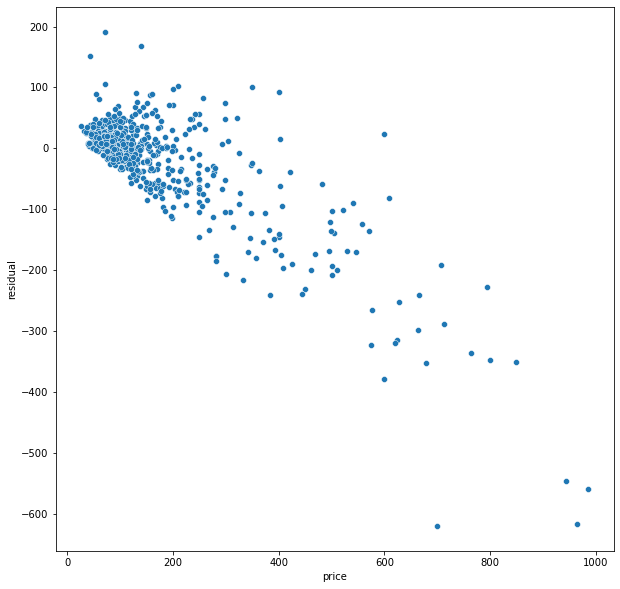

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = results, x='price', y='residual')

The r2 score is better for the random forest model, but the residual plot shows the same problem as the lasso model. As the airbnb in the test set becomes more expensive, the model is predicting a much lower price. 

In [31]:
importances = dict(zip(X_train,rf.feature_importances_))
importances =pd.DataFrame.from_dict(importances, orient ='index')
importances= importances.sort_values(by=0, ascending = False)
importances.head(20)

,0
bathrooms_text,0.386441
reviews_per_month,0.075732
bedrooms,0.075661
Median Sales Price,0.027058
calculated_host_listings_count,0.024890
prop_Private room in house,0.024268
availability_365,0.021971
days_active,0.021730
number_of_reviews_l30d,0.020761
accommodates,0.020694


## Random Forest after removing outliers

In [180]:
no_outliers = lasso_data
no_outliers["price"] = targets["price"]

In [181]:
def remove_outliers(data, columns = columns):
    global no_outliers
    for col in columns:
        med = np.median(data[col])
        std_p= np.std(data[col])
        outlier_high = (3*std_p) + med
        outlier_low = med - (3*std_p) 
        no_outliers = data[(no_outliers[col]<outlier_high) & (data[col]>outlier_low)]

In [182]:
columns = ['bathrooms_text']
remove_outliers(no_outliers)

In [183]:
print('This removed ' + str(lasso_data.shape[0] - no_outliers.shape[0]) +' rows')

This removed 59 rows


In [132]:
no_outliers.head()

,Median Sales Price,PercentShortTermRentals,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,...,prop_Private room in guesthouse,prop_Private room in hostel,prop_Private room in house,prop_Private room in loft,prop_Private room in resort,prop_Private room in townhouse,prop_Room in aparthotel,prop_Room in boutique hotel,prop_Tiny house,price
0,134250.0,4.626335,100.0,100.0,1,1,1,8,2.0,4.0,...,0,0,0,0,0,0,0,0,0,144.00
1,134250.0,4.626335,96.0,98.0,0,1,1,6,2.5,3.0,...,0,0,0,0,0,0,0,0,0,95.00
2,134250.0,4.626335,100.0,84.0,1,1,1,4,1.0,2.0,...,0,0,0,0,0,0,0,0,0,70.43
3,134250.0,4.626335,95.0,99.0,0,1,1,6,2.5,3.0,...,0,0,0,0,0,0,0,0,0,90.00
4,134250.0,4.626335,100.0,100.0,0,1,1,8,2.0,3.0,...,0,0,0,0,0,0,0,0,0,89.00


In [35]:
X = no_outliers
y = np.log(no_outliers.price)

In [36]:
X = X.drop(columns = 'price')

In [37]:
print(y.head())

0    4.969813
1    4.553877
2    4.254619
3    4.499810
4    4.488636
Name: price, dtype: float64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3)

In [39]:
params = {'max_depth':range(10,25)}
gridcv = GridSearchCV(rf, param_grid=params, cv = 10)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=1000),
             param_grid={'max_depth': range(10, 25)})

In [40]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'max_depth': 21}
0.6451559826757827


In [41]:
rf=RandomForestRegressor(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [42]:
y_pred = rf.predict(X_test)

In [43]:
rf.score(X_test, y_test)

0.6254225892325411

In [44]:
r2_score(y_test, y_pred)

0.6254225892325411

In [45]:
results=y_test.to_frame().reset_index()
results['predicted_price']=pd.Series(y_pred)
results['predicted_price']=results.predicted_price
results['price']=results.price
results['residual'] =results.predicted_price-results.price
results.head()

,index,price,predicted_price,residual
0,1353,4.595120,5.553960,0.958840
1,660,4.736198,4.629290,-0.106909
2,952,5.192957,4.877385,-0.315572
3,1451,4.262680,4.379253,0.116574
4,841,4.564348,4.916386,0.352038


<AxesSubplot:xlabel='price', ylabel='residual'>

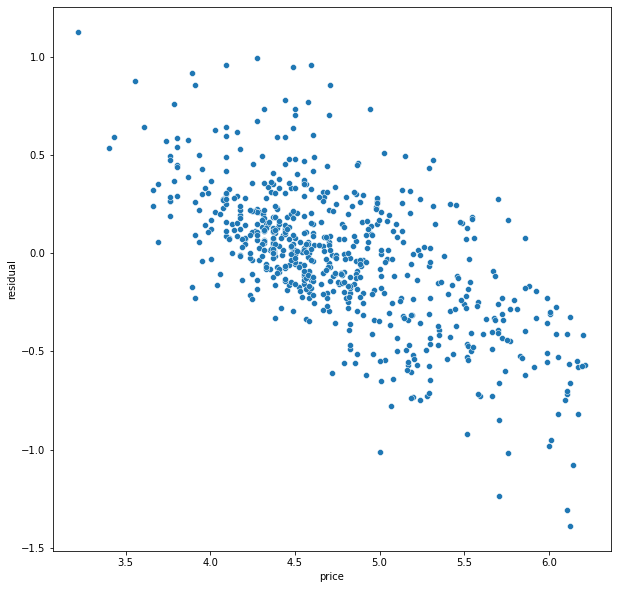

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = results, x='price', y='residual')